In [171]:
# pip install yfinance


In [172]:
import yfinance as yf

# Download Apple's stock data from Jan 2020 to Jan 2024
data = yf.download('TCS.NS', start='2014-01-01', end='2024-01-01',interval='1mo')

# Display first few rows
print(data.head())

data.to_csv('TCSNSmonthly.csv')



C:\Users\shett\AppData\Local\Temp\ipykernel_17328\2106712201.py:4: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download('TCS.NS', start='2014-01-01', end='2024-01-01',interval='1mo')
[*********************100%***********************]  1 of 1 completed

Price            Close        High         Low        Open    Volume
Ticker          TCS.NS      TCS.NS      TCS.NS      TCS.NS    TCS.NS
Date                                                                
2014-01-01  930.773804  990.477394  891.815893  905.459502  66137366
2014-02-01  946.869812  948.638107  867.546232  924.506085  45670390
2014-03-01  887.538452  956.543607  836.882051  945.226539  64102864
2014-04-01  910.858948  941.980954  873.745584  892.468704  50211136
2014-05-01  890.950500  937.571009  831.930999  910.859366  62287858


In [173]:
import pandas as pd 
import numpy as np
from numpy import log
from pandas import Series

df=pd.read_csv("TCSNSmonthly.csv")

In [174]:
df.head()

,Price,Close,High,Low,Open,Volume
0,Ticker,TCS.NS,TCS.NS,TCS.NS,TCS.NS,TCS.NS
1,Date,NaN,NaN,NaN,NaN,NaN
2,2014-01-01,930.7738037109375,990.4773941565916,891.815892761256,905.4595016417325,66137366
3,2014-02-01,946.8698120117188,948.6381067282077,867.5462320085202,924.5060847149463,45670390
4,2014-03-01,887.5384521484375,956.5436068263926,836.8820505105357,945.2265387970551,64102864


In [175]:
# so we need to remove startig two rows we use skiprows function and rename price to date

In [176]:
df=pd.read_csv("TCSNS.csv",skiprows=2)

In [177]:
df.head()

,Date,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5
0,2014-01-01,894.328247,907.286496,893.414543,905.459088,529952
1,2014-01-02,900.018494,909.155737,895.512131,899.603164,1726948
2,2014-01-03,922.944580,925.810413,891.815675,899.063150,2618174
3,2014-01-06,930.171448,931.998856,912.478381,925.768917,2311810
4,2014-01-07,916.278809,937.169895,913.309244,930.337748,2897486


In [178]:
df=df.rename(columns={'Price':'Date','Unnamed: 1':'Close','Unnamed: 2':'High','Unnamed: 3':'Low','Unnamed: 4':'Open','Unnamed: 5':'Volume'})

In [179]:
df.head()

,Date,Close,High,Low,Open,Volume
0,2014-01-01,894.328247,907.286496,893.414543,905.459088,529952
1,2014-01-02,900.018494,909.155737,895.512131,899.603164,1726948
2,2014-01-03,922.944580,925.810413,891.815675,899.063150,2618174
3,2014-01-06,930.171448,931.998856,912.478381,925.768917,2311810
4,2014-01-07,916.278809,937.169895,913.309244,930.337748,2897486


In [180]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2465 entries, 0 to 2464
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2465 non-null   object 
 1   Close   2465 non-null   float64
 2   High    2465 non-null   float64
 3   Low     2465 non-null   float64
 4   Open    2465 non-null   float64
 5   Volume  2465 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 115.7+ KB


In [181]:
df['Date']=pd.to_datetime(df['Date'])

In [182]:
df.set_index('Date',inplace=True)

In [183]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2014-01-01,894.328247,907.286496,893.414543,905.459088,529952
2014-01-02,900.018494,909.155737,895.512131,899.603164,1726948
2014-01-03,922.944580,925.810413,891.815675,899.063150,2618174
2014-01-06,930.171448,931.998856,912.478381,925.768917,2311810
2014-01-07,916.278809,937.169895,913.309244,930.337748,2897486


In [184]:
df.sort_index(inplace=True)

In [185]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2014-01-01,894.328247,907.286496,893.414543,905.459088,529952
2014-01-02,900.018494,909.155737,895.512131,899.603164,1726948
2014-01-03,922.944580,925.810413,891.815675,899.063150,2618174
2014-01-06,930.171448,931.998856,912.478381,925.768917,2311810
2014-01-07,916.278809,937.169895,913.309244,930.337748,2897486


<Axes: title={'center': 'Tcs stock open price'}, xlabel='Date'>

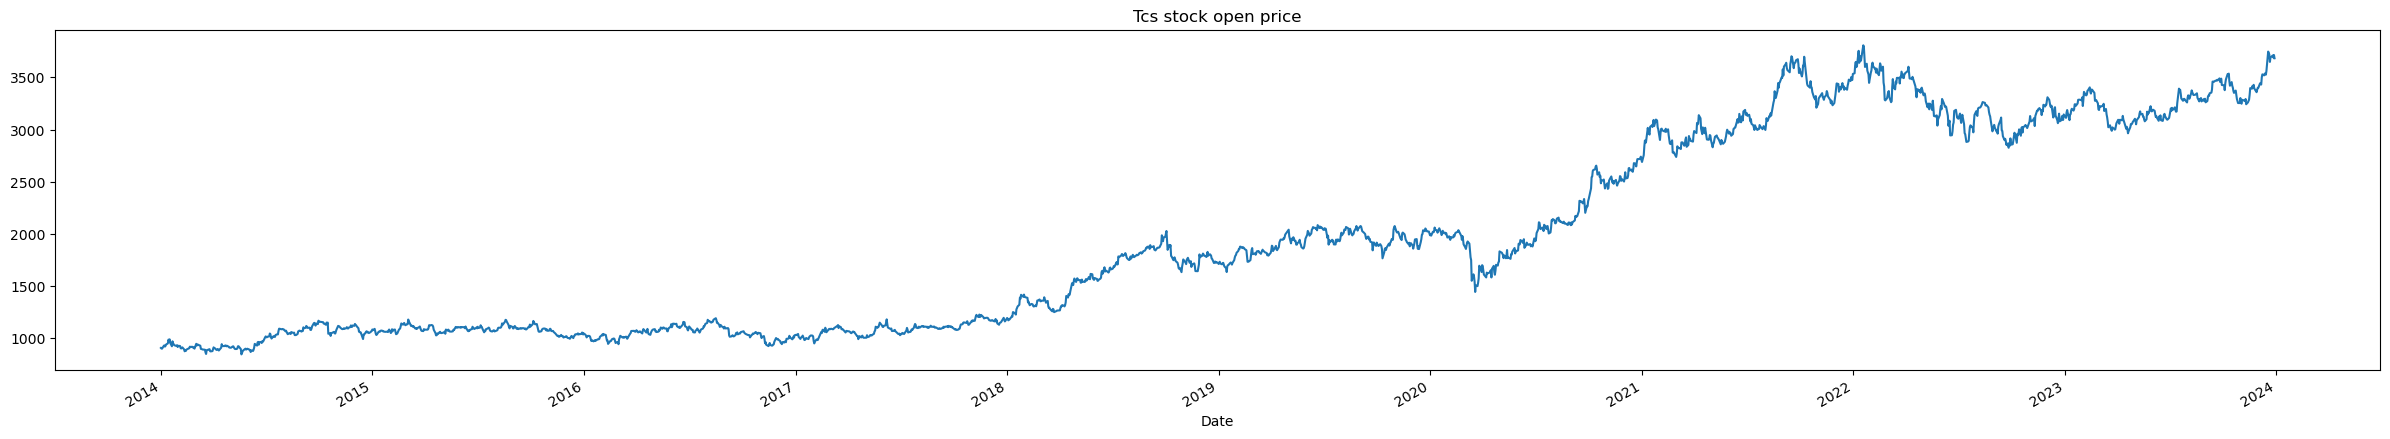

In [186]:
df['Open'].plot(figsize=(30,5),title='Tcs stock open price')

In [187]:
monthly_avg=df['Close'].resample('ME').mean()

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2465 entries, 2014-01-01 to 2023-12-29
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2465 non-null   float64
 1   High    2465 non-null   float64
 2   Low     2465 non-null   float64
 3   Open    2465 non-null   float64
 4   Volume  2465 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 115.5 KB


In [189]:
df.head()

,Close,High,Low,Open,Volume
Date,,,,,
2014-01-01,894.328247,907.286496,893.414543,905.459088,529952
2014-01-02,900.018494,909.155737,895.512131,899.603164,1726948
2014-01-03,922.944580,925.810413,891.815675,899.063150,2618174
2014-01-06,930.171448,931.998856,912.478381,925.768917,2311810
2014-01-07,916.278809,937.169895,913.309244,930.337748,2897486


In [190]:
print(monthly_avg.head())

Date
2014-01-31    936.840101
2014-02-28    902.460938
2014-03-31    896.287225
2014-04-30    910.119992
2014-05-31    895.812102
Freq: ME, Name: Close, dtype: float64


In [191]:
df

,Close,High,Low,Open,Volume
Date,,,,,
2014-01-01,894.328247,907.286496,893.414543,905.459088,529952
2014-01-02,900.018494,909.155737,895.512131,899.603164,1726948
2014-01-03,922.944580,925.810413,891.815675,899.063150,2618174
2014-01-06,930.171448,931.998856,912.478381,925.768917,2311810
2014-01-07,916.278809,937.169895,913.309244,930.337748,2897486
...,...,...,...,...,...
2023-12-22,3714.977295,3736.301450,3654.744922,3691.661538,2413058
2023-12-26,3687.338379,3724.692117,3682.092191,3710.945630,1285231
2023-12-27,3702.541748,3709.342176,3660.573438,3690.689620,1293976


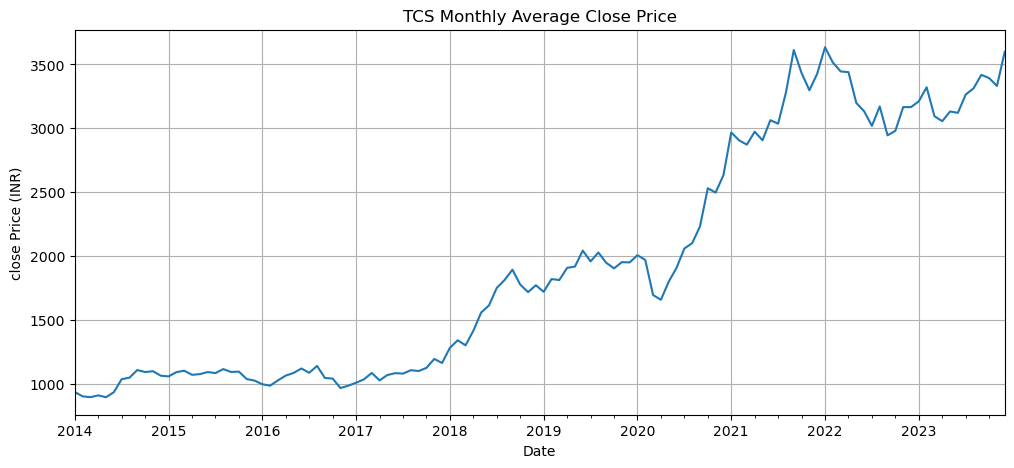

In [192]:
import matplotlib.pyplot as plt

monthly_avg.plot(title='TCS Monthly Average Close Price', figsize=(12, 5))
plt.xlabel('Date')
plt.ylabel('close Price (INR)')
plt.grid(True)
plt.show()


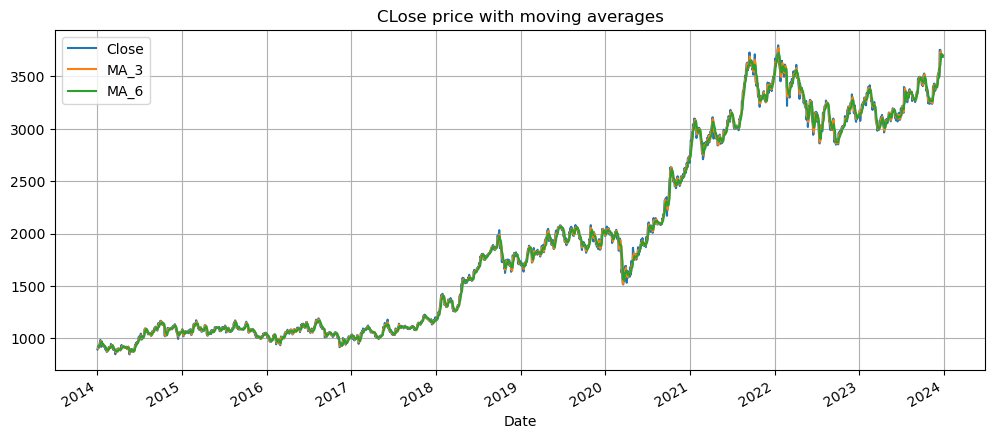

In [193]:
# Trend moving avg

# 3 months moving average
df['MA_3']=df['Close'].rolling(window=3).mean()

# 6 months moving average
df['MA_6']=df['Close'].rolling(window=6).mean()

df[['Close','MA_3','MA_6']].plot(figsize=(12,5),title='CLose price with moving averages')
plt.grid(True)
plt.show()


# stationary check

In [194]:
from statsmodels.tsa.stattools import adfuller

result=adfuller(df['Close'].dropna())
print(f' p values {result[1]}')


if result[1]<0.05:
    print("Strong evidence the data series is stationary")
else:
    print("Strong evidence the data series is Non stationary")

 p values 0.9625337341834029
Strong evidence the data series is Non stationary


# decompose the series to make the series to Stationary

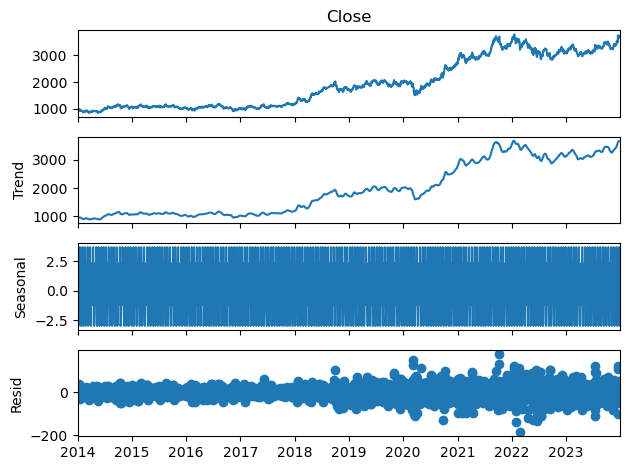

In [195]:
from statsmodels.tsa.seasonal import seasonal_decompose

result=seasonal_decompose(df['Close'].dropna(),model='additive',period=12)
result.plot()
plt.show()

In [196]:
df['Close_diff']=df['Close'].diff()

In [197]:
df_diff=df['Close_diff'].dropna()
    
from statsmodels.tsa.stattools import adfuller

result=adfuller(df_diff)

if result[1]<0.05:
    print("Stationary")
else:
    print("Non stationary")

Stationary


In [198]:
print(result[1])

4.1066355472465083e-19


In [199]:
# !pip install pmdarima

In [200]:
from pmdarima import auto_arima

In [201]:
stepwise_model=auto_arima(df_diff)
print(stepwise_model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                 2464
Model:               SARIMAX(2, 0, 3)   Log Likelihood              -11936.150
Date:                Thu, 24 Jul 2025   AIC                          23886.300
Time:                        16:22:19   BIC                          23926.967
Sample:                             0   HQIC                         23901.075
                               - 2464                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      2.9325      1.201      2.441      0.015       0.578       5.287
ar.L1          0.0076      0.014      0.552      0.581      -0.019       0.035
ar.L2         -0.9678      0.013    -72.457      0.0

In [202]:
# here d=1

In [203]:
# to find p partial auto correlation we use graph manual method to check p
# to find q auto correlation we use graph manual method to check q

In [204]:
from statsmodels.graphics.tsaplots import plot_pacf,plot_acf
import matplotlib.pyplot as plt

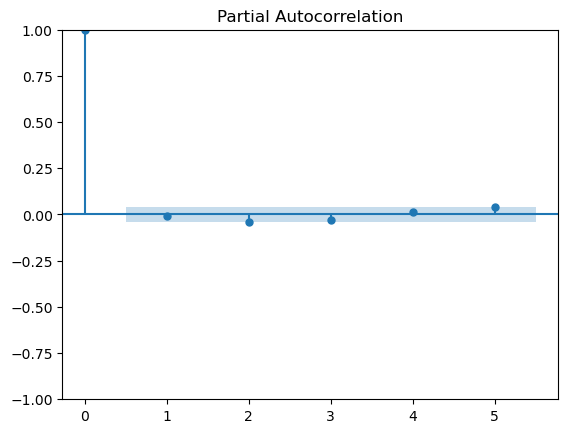

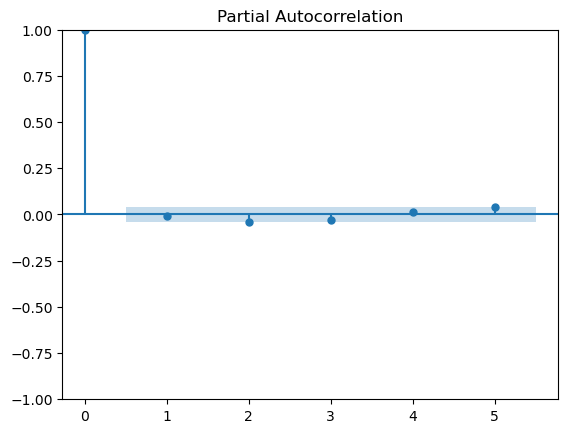

In [205]:
# p-partial autocorrelation

# plt.figure(figsize=(12,5))
# plt.subplot(121)
plot_pacf(df_diff,lags=5)
# plt.title("PACF")

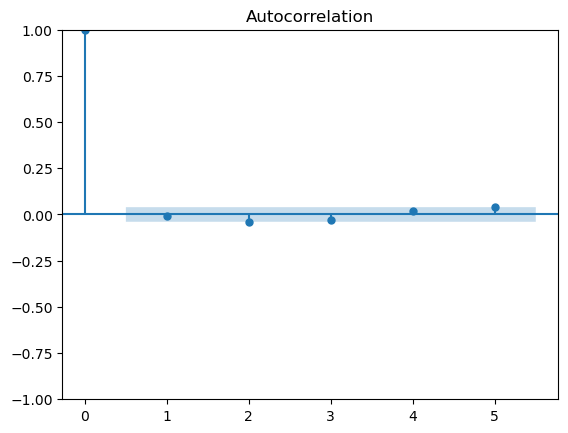

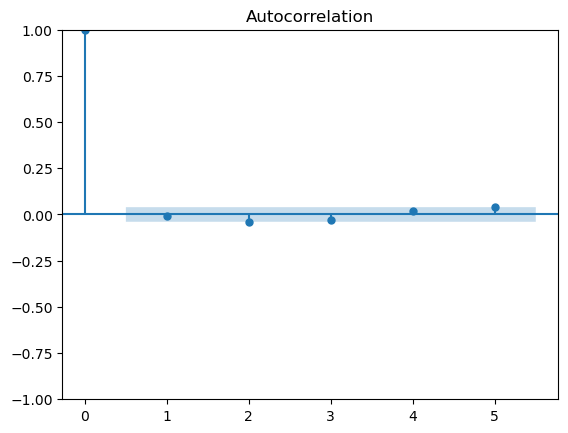

In [206]:
# q auto correlation function
# plt.figure(figsize=(12,5))
# plt.subplot(122)
plot_acf(df_diff,lags=5)
# plt.title("ACF")

In [207]:
# p=0and d=0

In [208]:
from statsmodels.tsa.arima.model import ARIMA

# Replace with best p,d,q from auto_arima
model = ARIMA(df['Close'], order=(0, 1, 0))
model_fit = model.fit()

# Summary and forecast
print(model_fit.summary())
forecast = model_fit.forecast(steps=50)  # Forecast next 30 days
print(forecast)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2465
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -11948.955
Date:                Thu, 24 Jul 2025   AIC                          23899.909
Time:                        16:22:19   BIC                          23905.719
Sample:                             0   HQIC                         23902.020
                               - 2465                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       954.2735     13.856     68.872      0.000     927.117     981.430
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              3403.14
Prob(Q):                              0.76   Pr

c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

In [209]:
df.tail()

,Close,High,Low,Open,Volume,MA_3,MA_6,Close_diff
Date,,,,,,,,
2023-12-22,3714.977295,3736.301450,3654.744922,3691.661538,2413058,3688.925212,3712.378540,35.459473
2023-12-26,3687.338379,3724.692117,3682.092191,3710.945630,1285231,3693.944499,3701.781209,-27.638916
2023-12-27,3702.541748,3709.342176,3660.573438,3690.689620,1293976,3701.619141,3694.009237,15.203369
2023-12-28,3691.564209,3728.578067,3683.986778,3714.977209,1682889,3693.814779,3691.369995,-10.977539
2023-12-29,3685.249512,3713.617205,3658.047796,3683.889521,1574996,3693.118490,3693.531494,-6.314697


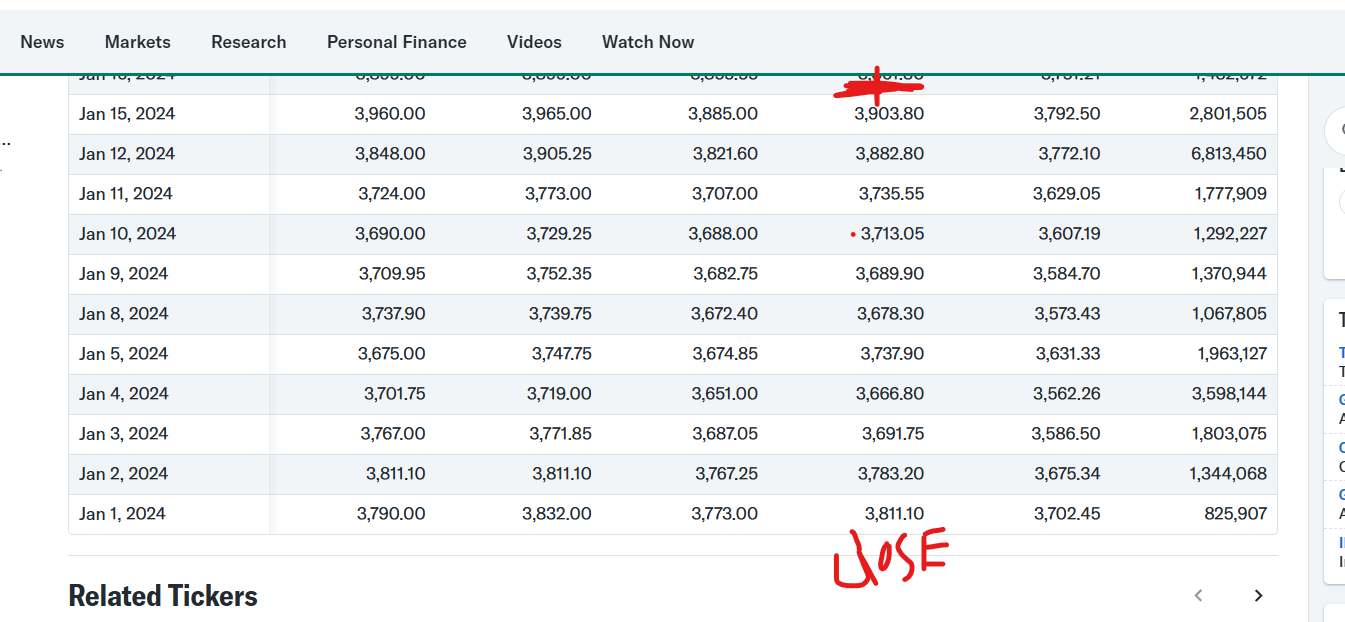

In [210]:
# 2465    3685.249512
# 2466    3685.249512
# 2467    3685.249512
# 2468    3685.249512
# 2469    3685.249512
# 2470    3685.249512
# 2471    3685.249512
# 2472    3685.249512
# 2473    3685.249512
# 2474    3685.249512
# 2475    3685.249512
# 2476    3685.249512
# 2477    3685.249512
# 2478    3685.249512
# 2479    3685.249512
# 2480    3685.249512

In [211]:
df_diff

Date
2014-01-02     5.690247
2014-01-03    22.926086
2014-01-06     7.226868
2014-01-07   -13.892639
2014-01-08    11.005737
                ...    
2023-12-22    35.459473
2023-12-26   -27.638916
2023-12-27    15.203369
2023-12-28   -10.977539
2023-12-29    -6.314697
Name: Close_diff, Length: 2464, dtype: float64

In [212]:
monthly_df = df['Close'].resample('ME').mean()

In [213]:
monthly_df

Date
2014-01-31     936.840101
2014-02-28     902.460938
2014-03-31     896.287225
2014-04-30     910.119992
2014-05-31     895.812102
                 ...     
2023-08-31    3312.418546
2023-09-30    3418.590027
2023-10-31    3392.749280
2023-11-30    3331.615125
2023-12-31    3599.622437
Freq: ME, Name: Close, Length: 120, dtype: float64

In [214]:
monthly_diff = monthly_df.diff().dropna()

In [215]:
# df_diff=df['Close_diff'].dropna()
    
from statsmodels.tsa.stattools import adfuller

result=adfuller(monthly_diff)

if result[1]<0.05:
    print("Stationary")
else:
    print("Non stationary")

Stationary


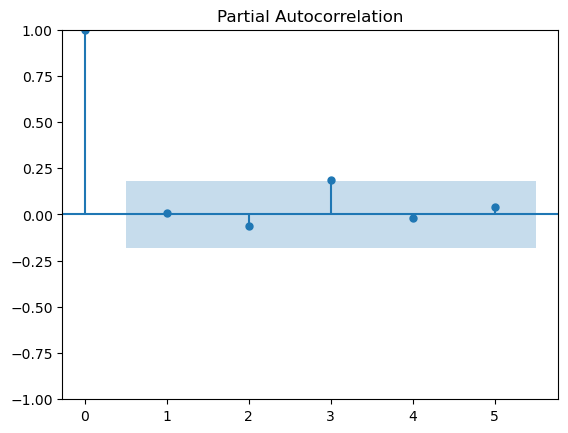

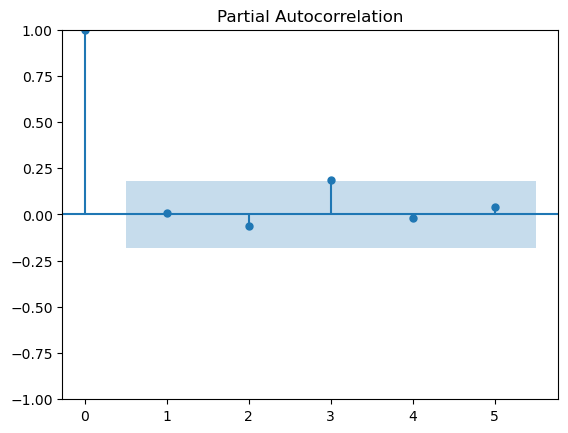

In [216]:
plot_pacf(monthly_diff,lags=5)

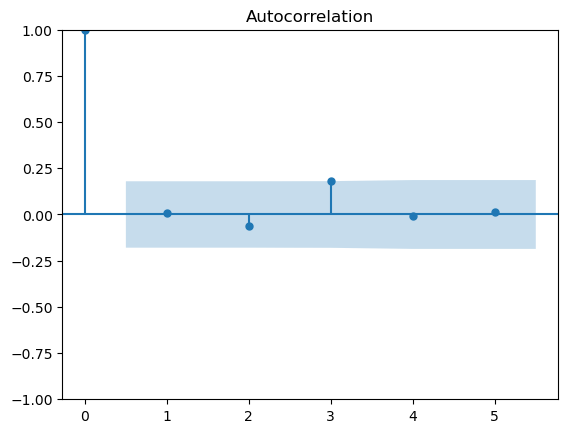

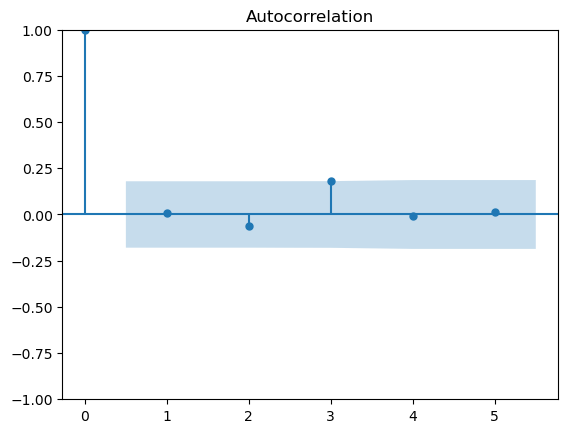

In [217]:
plot_acf(monthly_diff,lags=5)

In [218]:
from statsmodels.tsa.arima.model import ARIMA

# Replace with best p,d,q from auto_arima
model = ARIMA(df['Close'], order=(0, 1, 0))
model_fit = model.fit()

# Summary and forecast
print(model_fit.summary())
forecast = model_fit.forecast(steps=50)  # Forecast next 30 days
print(forecast)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2465
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -11948.955
Date:                Thu, 24 Jul 2025   AIC                          23899.909
Time:                        16:22:19   BIC                          23905.719
Sample:                             0   HQIC                         23902.020
                               - 2465                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       954.2735     13.856     68.872      0.000     927.117     981.430
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              3403.14
Prob(Q):                              0.76   Pr

c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

In [219]:
df['Seasonality']=df['Close']-df['Close'].shift(12)

In [220]:
adfuller(df['Seasonality'].dropna())

(-9.48287074650222,
 3.830992910166058e-16,
 27,
 2425,
 {'1%': -3.433049478585333,
  '5%': -2.8627325990879102,
  '10%': -2.567404869422893},
 24155.996180990973)

In [221]:
from statsmodels.tsa.arima_model import ARIMA
import statsmodels.api as sm
model1=sm.tsa.statespace.SARIMAX(df['Close'],order=(0,1,0),seasonal_order=(2,1,5,12))

c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [222]:
df.isnull().sum()

Close           0
High            0
Low             0
Open            0
Volume          0
MA_3            2
MA_6            5
Close_diff      1
Seasonality    12
dtype: int64

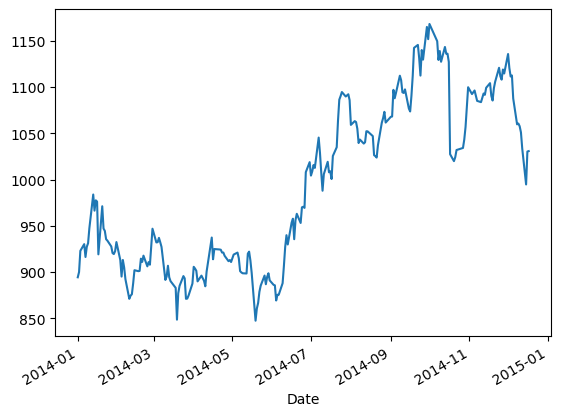

In [223]:
df['Close'][:235,].plot()
plt.show()

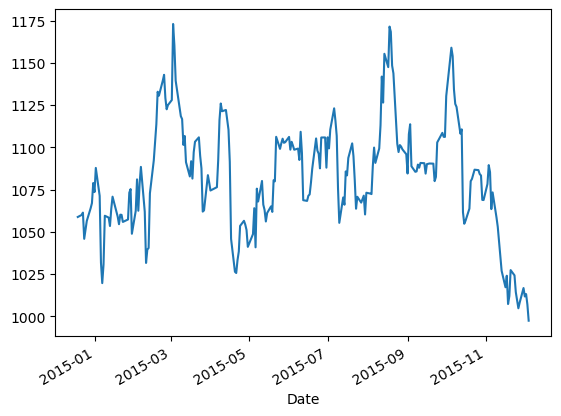

In [224]:
df['Close'][236:472,].plot()
plt.show()

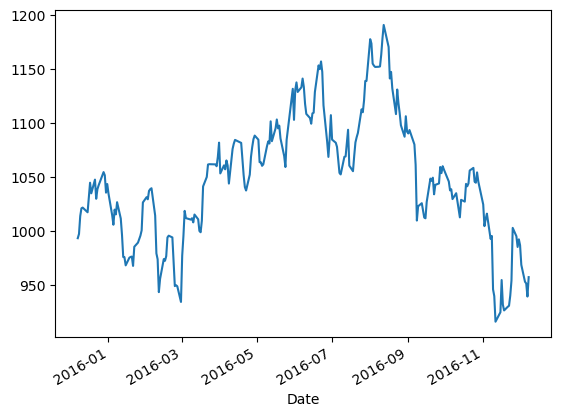

In [225]:
df['Close'][472:720,].plot()
plt.show()

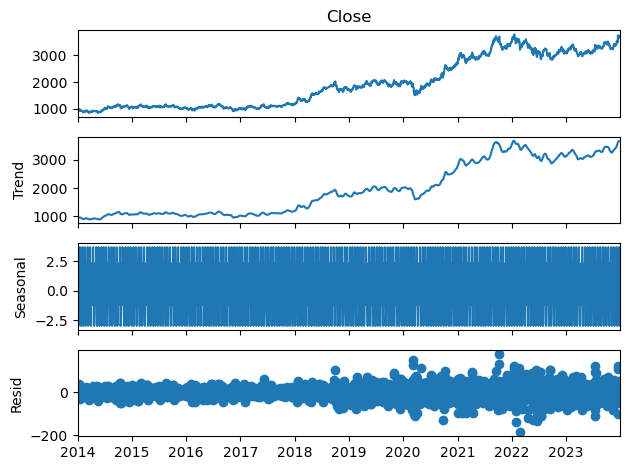

In [226]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition=seasonal_decompose(df['Close'],period=12)
decomposition.plot()
plt.show()

In [227]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# result = seasonal_decompose(df['Close'][:100,], model='additive', period=80)  # or 7/365 depending on data
# result.plot()
# plt.show()


In [228]:
df_seasonal_diff = df['Close'].diff(12)  # if monthly seasonality


In [229]:
df_seasonal_diff

Date
2014-01-01           NaN
2014-01-02           NaN
2014-01-03           NaN
2014-01-06           NaN
2014-01-07           NaN
                 ...    
2023-12-22    213.630615
2023-12-26    175.500000
2023-12-27    179.239746
2023-12-28    152.523926
2023-12-29    117.841553
Name: Close, Length: 2465, dtype: float64

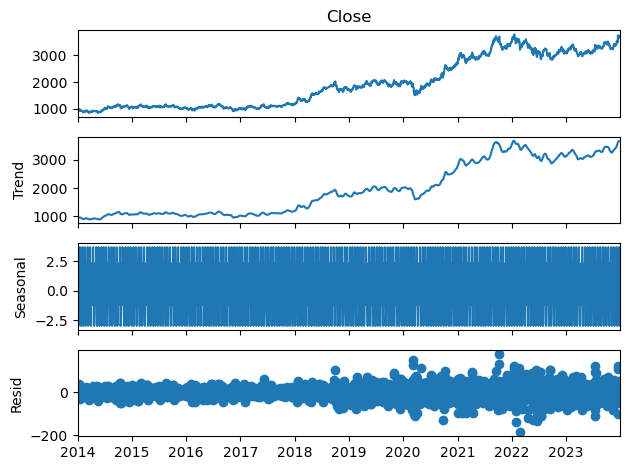

In [230]:
from statsmodels.tsa.seasonal import seasonal_decompose 
decomposition=seasonal_decompose(df['Close'],period=12)
decomposition.plot()
plt.show()

In [231]:
df_seasonal_diff = df['Close'].diff(12).dropna()


In [232]:
from statsmodels.tsa.stattools import adfuller
adf_result = adfuller(df_seasonal_diff)
print(f'ADF Statistic: {adf_result[0]}')
print(f'p-value: {adf_result[1]}')


ADF Statistic: -9.48287074650222
p-value: 3.830992910166058e-16


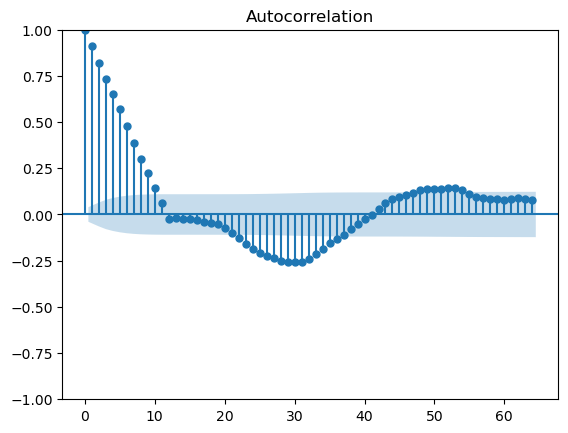

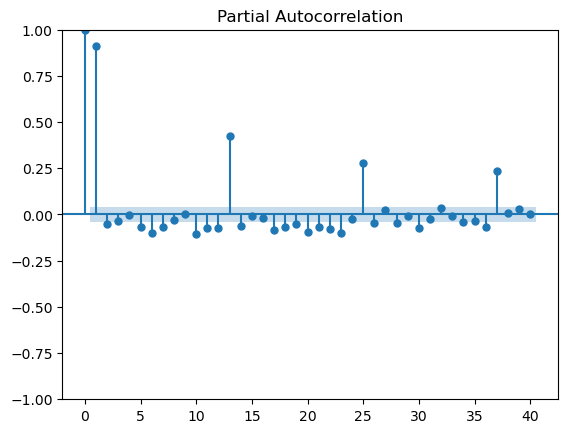

In [233]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plot_acf(df_seasonal_diff, lags=64)
plot_pacf(df_seasonal_diff, lags=40)
plt.show()


In [234]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df['Close'],
                order=(0, 1, 0),
                seasonal_order=(1, 1, 1, 12))
results = model.fit()
print(results.summary())


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                      SARIMAX Results                                       
Dep. Variable:                                Close   No. Observations:                 2465
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood              -11920.098
Date:                              Thu, 24 Jul 2025   AIC                          23846.195
Time:                                      16:22:24   BIC                          23863.609
Sample:                                           0   HQIC                         23852.523
                                             - 2465                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.0143      0.017      0.847      0.397      -0.019       0.047
ma.S.L12      -0.99

In [235]:
# Summary and forecast
# print(model_fit.summary())
forecast = model_fit.forecast(steps=50)  # Forecast next 30 days
print(forecast)

2465    3685.249512
2466    3685.249512
2467    3685.249512
2468    3685.249512
2469    3685.249512
2470    3685.249512
2471    3685.249512
2472    3685.249512
2473    3685.249512
2474    3685.249512
2475    3685.249512
2476    3685.249512
2477    3685.249512
2478    3685.249512
2479    3685.249512
2480    3685.249512
2481    3685.249512
2482    3685.249512
2483    3685.249512
2484    3685.249512
2485    3685.249512
2486    3685.249512
2487    3685.249512
2488    3685.249512
2489    3685.249512
2490    3685.249512
2491    3685.249512
2492    3685.249512
2493    3685.249512
2494    3685.249512
2495    3685.249512
2496    3685.249512
2497    3685.249512
2498    3685.249512
2499    3685.249512
2500    3685.249512
2501    3685.249512
2502    3685.249512
2503    3685.249512
2504    3685.249512
2505    3685.249512
2506    3685.249512
2507    3685.249512
2508    3685.249512
2509    3685.249512
2510    3685.249512
2511    3685.249512
2512    3685.249512
2513    3685.249512
2514    3685.249512


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [236]:
from statsmodels.tsa.arima.model import ARIMA

# Replace with best p,d,q from auto_arima
model = ARIMA(df['Close'], order=(0, 1, 0))
model_fit = model.fit()

# Summary and forecast
print(model_fit.summary())
forecast = model_fit.forecast(steps=50)  # Forecast next 30 days
print(forecast)


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                 2465
Model:                 ARIMA(0, 1, 0)   Log Likelihood              -11948.955
Date:                Thu, 24 Jul 2025   AIC                          23899.909
Time:                        16:22:24   BIC                          23905.719
Sample:                             0   HQIC                         23902.020
                               - 2465                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2       954.2735     13.856     68.872      0.000     927.117     981.430
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):              3403.14
Prob(Q):                              0.76   Pr

c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\U

In [237]:
# from pmdarima import auto_arima

# stepwise_model = auto_arima(df['Close'],
#                             start_p=0, start_q=0,
#                             max_p=3, max_q=3,
#                             seasonal=True,
#                             m=80,        # seasonal period
#                             start_P=0, start_Q=0,
#                             max_P=2, max_Q=2,
#                             d=1, D=1,
#                             trace=True,
#                             error_action='ignore',
#                             suppress_warnings=True,
#                             stepwise=True)

# print(stepwise_model.summary())


In [238]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df['Close'], 
                order=(1, 1, 1),
                seasonal_order=(1, 1, 1, 12))  # 30-day seasonality
results = model.fit()
print(results.summary())


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                     SARIMAX Results                                      
Dep. Variable:                              Close   No. Observations:                 2465
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -11919.226
Date:                            Thu, 24 Jul 2025   AIC                          23848.451
Time:                                    16:22:33   BIC                          23877.475
Sample:                                         0   HQIC                         23858.998
                                           - 2465                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6791      0.277      2.453      0.014       0.136       1.222
ma.L1         -0.6986      0.270   

In [239]:
# import itertools

# p=d=q=range(0,2)

# pdq=list(itertools.product(p,d,q)) # trend
# seasonal_pdq=[(x[0],x[1],x[2],12) for x in pdq]


# print("check some random combinations are: ")
# print("{} x {} ".format(pdq[0],seasonal_pdq[1]))
# print("{} x {} ".format(pdq[1],seasonal_pdq[0]))
# print("{} x {} ".format(pdq[2],seasonal_pdq[2]))
# print("{} x {} ".format(pdq[0],seasonal_pdq[2]))





# for param in pdq:
#     for param_seasonal in seasonal_pdq:
#         try:
#             model=sm.tsa.statespace.SARIMAX(df['Close'],order=param,seasonal_order=param_seasonal,
#                                             enforce_stationarity=False,enforce_invertibility=False)
#             result=model.fit()
#             print("SARIMA {} X {} - AIC : {}".format(param,param_seasonal, result.aic))
#         except:
#             continue

# # enforce_invertibility--autocorrelation
# # enforce_stationarity--partial auto correlation

In [240]:
import itertools
import statsmodels.api as sm

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))  # trend components
seasonal_pdq = [(x[0], x[1], x[2], 30) for x in pdq]  # seasonal components with m=30

best_aic = float("inf")         # Start with infinity
best_order = None
best_seasonal_order = None
best_model = None

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            model = sm.tsa.statespace.SARIMAX(df['Close'],
                                              order=param,
                                              seasonal_order=param_seasonal,
                                              enforce_stationarity=False,
                                              enforce_invertibility=False)
            result = model.fit(disp=False)
            print(f"SARIMA{param}x{param_seasonal} AIC:{result.aic}")

            if result.aic < best_aic:
                best_aic = result.aic
                best_order = param
                best_seasonal_order = param_seasonal
                best_model = result
        except Exception as e:
            print(f"Failed for SARIMA{param}x{param_seasonal}: {e}")
            continue

print("\n\n✅ Best Model Found:")
print(f"Order: {best_order}")
print(f"Seasonal Order: {best_seasonal_order}")
print(f"Lowest AIC: {best_aic}")


SARIMA(0, 0, 0)x(0, 0, 0, 30) AIC:44825.77138923522


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMA(0, 0, 0)x(0, 0, 1, 30) AIC:41286.38486751482


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(0, 1, 0, 30) AIC:31581.57172241523


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(0, 1, 1, 30) AIC:31133.431796655706


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(1, 0, 0, 30) AIC:31520.506027518757


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(1, 0, 1, 30) AIC:31368.942308639125


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(1, 1, 0, 30) AIC:31111.692069321594


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 0)x(1, 1, 1, 30) AIC:31081.616334483733
SARIMA(0, 0, 1)x(0, 0, 0, 30) AIC:42979.73850044739


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMA(0, 0, 1)x(0, 0, 1, 30) AIC:38009.17036581655


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(0, 1, 0, 30) AIC:29048.108983461418


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(0, 1, 1, 30) AIC:28574.80624343898


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(1, 0, 0, 30) AIC:29015.786099762787


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(1, 0, 1, 30) AIC:28782.78905292137


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(1, 1, 0, 30) AIC:28554.835938697022


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(1, 1, 1, 30) AIC:28526.229790389934
SARIMA(0, 1, 0)x(0, 0, 0, 30) AIC:23891.17643431739


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMA(0, 1, 0)x(0, 0, 1, 30) AIC:23616.779309127014


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(0, 1, 0, 30) AIC:25357.849130020877


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(0, 1, 1, 30) AIC:23440.46857346072


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 0, 0, 30) AIC:23625.704092555


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 0, 1, 30) AIC:23618.77815767657


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 1, 0, 30) AIC:24333.836263060934


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 0)x(1, 1, 1, 30) AIC:23440.400335813047
SARIMA(0, 1, 1)x(0, 0, 0, 30) AIC:23883.865477589723


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMA(0, 1, 1)x(0, 0, 1, 30) AIC:23609.735470388197


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(0, 1, 0, 30) AIC:25346.545732412116


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(0, 1, 1, 30) AIC:23433.76885834809


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 0, 0, 30) AIC:23627.59376533112


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 0, 1, 30) AIC:23611.7354799086


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 1, 0, 30) AIC:24334.88398966517


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 1, 1, 30) AIC:23433.573738063307
SARIMA(1, 0, 0)x(0, 0, 0, 30) AIC:23899.42102437964


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMA(1, 0, 0)x(0, 0, 1, 30) AIC:23624.93098711686


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(0, 1, 0, 30) AIC:25324.18658021339


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(0, 1, 1, 30) AIC:23451.56622011771


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(1, 0, 0, 30) AIC:23624.988325509657


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(1, 0, 1, 30) AIC:23626.910858336145


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(1, 1, 0, 30) AIC:24304.339253343973


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(1, 1, 1, 30) AIC:23451.30859943563
SARIMA(1, 0, 1)x(0, 0, 0, 30) AIC:23892.588709156968


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMA(1, 0, 1)x(0, 0, 1, 30) AIC:23617.885393558616


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(0, 1, 0, 30) AIC:25308.103396580416


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(0, 1, 1, 30) AIC:23444.856322439013


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 0, 0, 30) AIC:23626.808103142735


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 0, 1, 30) AIC:23619.86755450778


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 1, 0, 30) AIC:24303.508294650073


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 1, 1, 30) AIC:23444.487556877248
SARIMA(1, 1, 0)x(0, 0, 0, 30) AIC:23893.12083473243


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMA(1, 1, 0)x(0, 0, 1, 30) AIC:23618.6746999618


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(0, 1, 0, 30) AIC:25356.13679583786


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(0, 1, 1, 30) AIC:23442.464143002857


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 0, 0, 30) AIC:23618.746484809682


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 0, 1, 30) AIC:23620.67364675283


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 1, 0, 30) AIC:24325.80964065438


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 1, 1, 30) AIC:23442.377427984415
SARIMA(1, 1, 1)x(0, 0, 0, 30) AIC:23884.459983284596


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(d

SARIMA(1, 1, 1)x(0, 0, 1, 30) AIC:23610.013196615284


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 1, 0, 30) AIC:25348.33335798207


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 1, 1, 30) AIC:23434.955692976335


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 0, 30) AIC:23618.907118314437


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 0, 1, 30) AIC:23612.01191075656


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 1, 0, 30) AIC:24327.303017831036


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 1, 1, 30) AIC:23434.510459065597


✅ Best Model Found:
Order: (0, 1, 1)
Seasonal Order: (1, 1, 1, 30)
Lowest AIC: 23433.573738063307


c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\shett\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


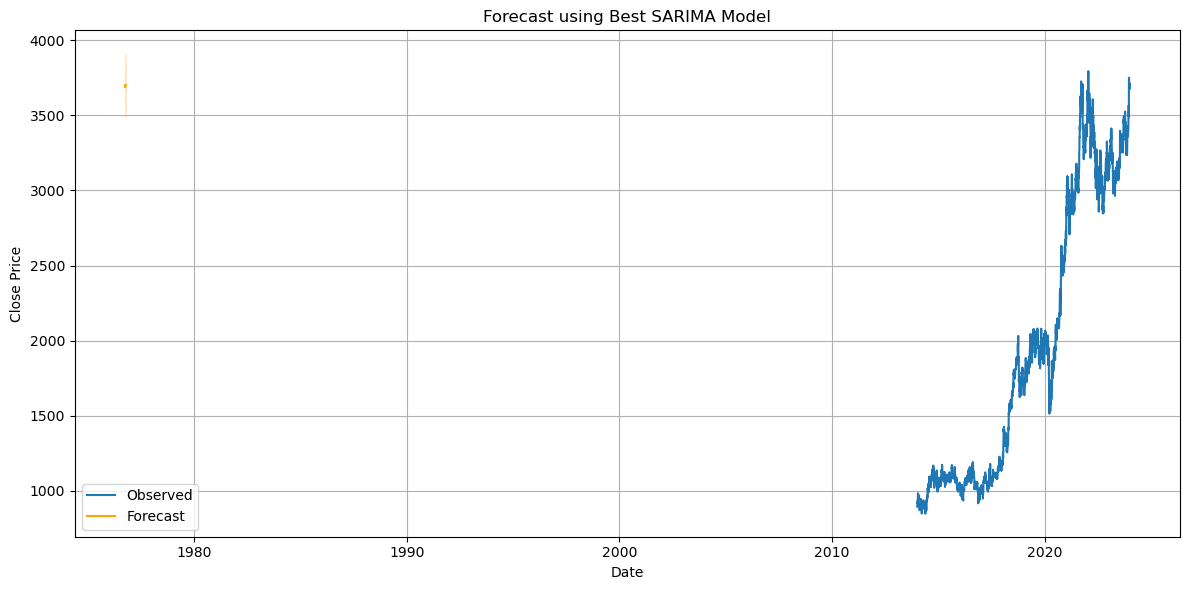

In [241]:
# Forecast the next 12 periods
n_periods = 12
forecast = best_model.get_forecast(steps=n_periods)

# Extract predicted mean and confidence intervals
pred_mean = forecast.predicted_mean
conf_int = forecast.conf_int()

# Plot the forecast
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Observed')
plt.plot(pred_mean.index, pred_mean, label='Forecast', color='orange')
plt.fill_between(pred_mean.index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='orange', alpha=0.2)
plt.title('Forecast using Best SARIMA Model')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


In [242]:
# Get confidence intervals
conf_int = forecast.conf_int()

# Combine forecast mean and intervals into one DataFrame
forecast_df = pd.DataFrame({
    'Forecast': forecast.predicted_mean,
    'Lower Bound (95%)': conf_int.iloc[:, 0],
    'Upper Bound (95%)': conf_int.iloc[:, 1]
})

# Display the forecast table
print("\n📊 Forecasted Values with Confidence Intervals:")
print(forecast_df)



📊 Forecasted Values with Confidence Intervals:
         Forecast  Lower Bound (95%)  Upper Bound (95%)
2465  3689.284141        3628.163145        3750.405137
2466  3688.081232        3601.812795        3774.349670
2467  3689.838500        3584.251047        3795.425954
2468  3695.571736        3573.689919        3817.453554
2469  3694.082919        3557.841792        3830.324045
2470  3699.619168        3550.394131        3848.844205
2471  3702.202102        3541.035794        3863.368410
2472  3702.057168        3529.775289        3874.339047
2473  3703.617069        3520.894566        3886.339572
2474  3700.280602        3507.682626        3892.878578
2475  3702.809141        3500.817935        3904.800347
2476  3702.192372        3491.225753        3913.158992


In [243]:
forecast_df.to_csv("forecast_with_confidence95%_TCS.csv")
